In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyrsm as rsm
import seaborn as sns
from scipy.stats import t

### Regression Analysis:

In [2]:
nba_pgdata = pd.read_parquet('nba_pgdata.parquet')
nba_pgdata.head()

,Player,Salary,Age,FG,RB,AST,STL,BLK,PTS
0,A.J. Price,885.12,26,2.824561,2.000000,3.596491,0.578947,0.052632,7.736842
1,Aaron Brooks,3250.00,28,2.698113,1.509434,2.150943,0.566038,0.188679,7.094340
2,Al Harrington,6687.40,32,2.000000,2.700000,1.000000,0.400000,0.100000,5.100000
3,Al Horford,12000.00,26,7.783784,10.229730,3.243243,1.054054,1.054054,17.418919
4,Al Jefferson,15000.00,28,7.833333,9.230769,2.102564,1.025641,1.141026,17.833333


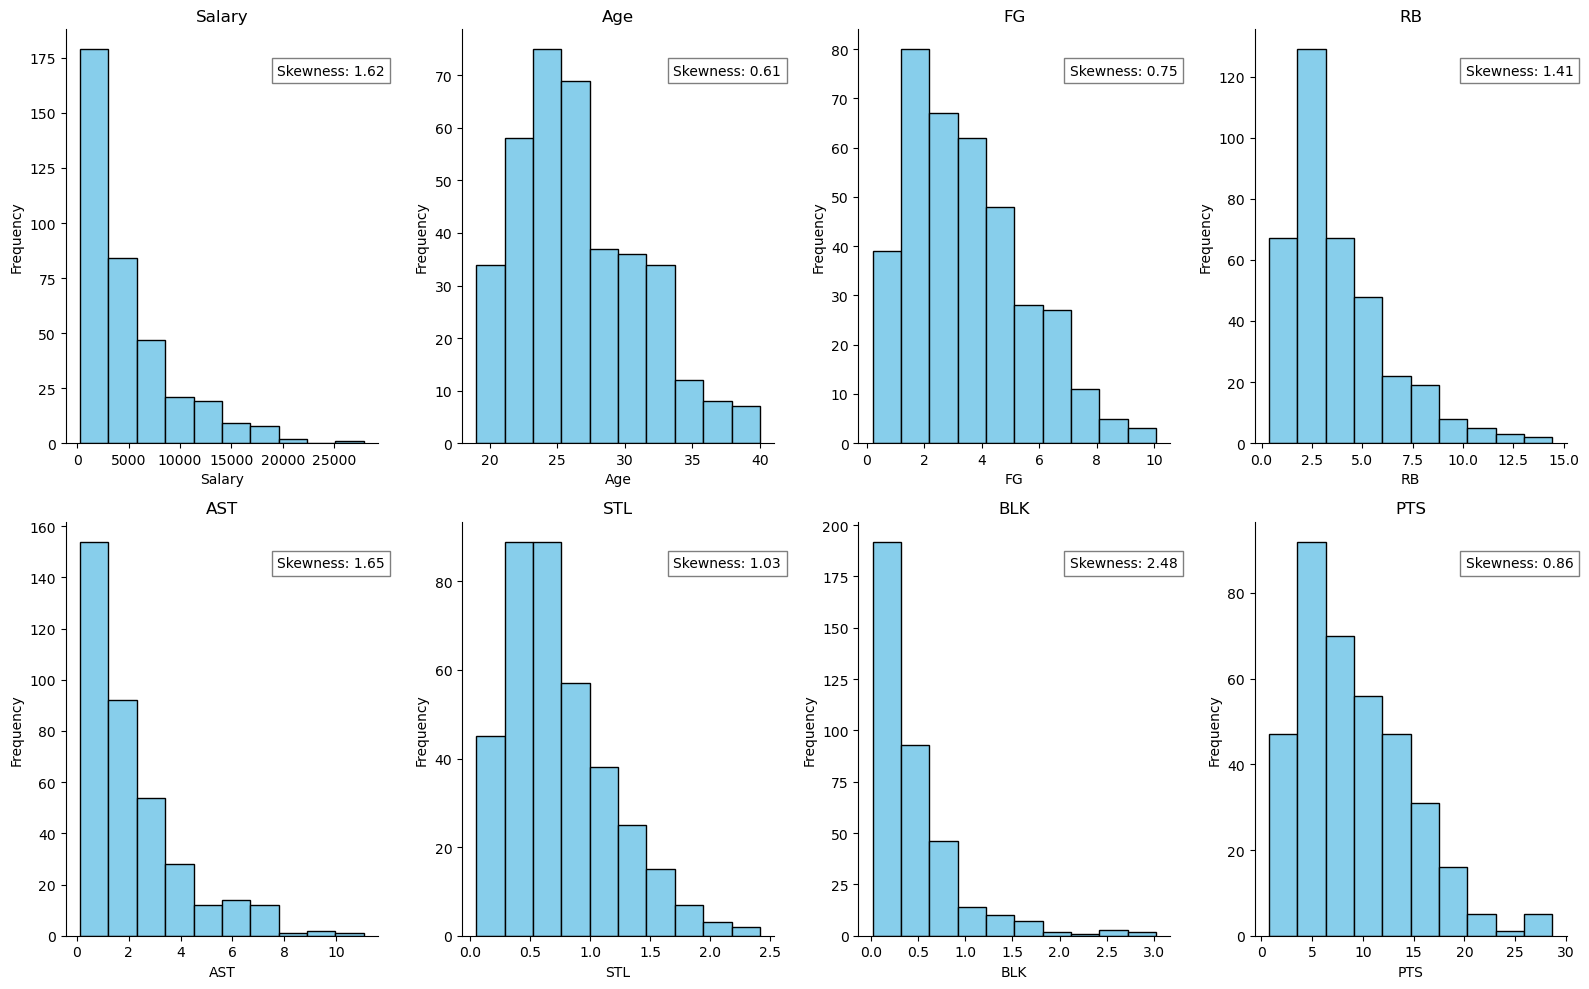

In [21]:
fig, ax = plt.subplots(2, 4, figsize=(16, 10))
columns = ['Salary', 'Age', 'FG', 'RB', 'AST', 'STL', 'BLK', 'PTS']

for i in range(2):
    for j in range(4):
        column = columns[i * 4 + j]
        data = nba_pgdata[column]
        skewness = data.skew()  # Calculate skewness
        ax[i, j].hist(data, color='skyblue', edgecolor='black')
        
        # Display skewness on the histogram
        ax[i, j].text(0.85, 0.90, f'Skewness: {skewness:.2f}',
                      transform=ax[i, j].transAxes, ha='center', va='center',
                      bbox=dict(facecolor='white', alpha=0.5))
        
        ax[i, j].set_title(column)
        ax[i, j].set_xlabel(column)
        ax[i, j].set_ylabel('Frequency')
        sns.despine(ax=ax[i, j])

plt.tight_layout()
plt.show()

The histograms provided illustrate the distribution of different variables, with skewness values indicated for each. Here is an analysis of the skewness in each histogram:

1. **Salary**: The distribution is right-skewed (positive skewness of 1.62), suggesting that most individuals have a salary on the lower end, with fewer individuals earning significantly higher salaries.

2. **Age**: This histogram shows a slight right skew (skewness of 0.61), indicating that there are more younger individuals than older ones, but the distribution is closer to normal compared to the Salary distribution.

3. **FG** (Field Goals): The skewness is moderately positive (0.75), meaning the data has a long tail to the right. Most players have lower FG numbers, with fewer players having high FG numbers.

4. **RB** (Rebounds): With a skewness of 1.41, this histogram is right-skewed. There are many instances of lower rebound numbers and fewer instances of very high rebound numbers.

5. **AST** (Assists): The skewness value of 1.65 indicates a strong right skew. The majority of players have a lower number of assists, with a small number having a very high count.

6. **STL** (Steals): This distribution has a skewness of 1.03, which is moderately right-skewed. Most players have fewer steals, with a tail showing that a small number have many more steals.

7. **BLK** (Blocks): The histogram is highly right-skewed (skewness of 2.48), showing that blocks are relatively rare events with a small number of players achieving a high number of blocks.

8. **PTS** (Points): With a skewness of 0.86, the distribution is moderately right-skewed. There is a high frequency of players with lower point totals, and fewer players scoring a lot of points.

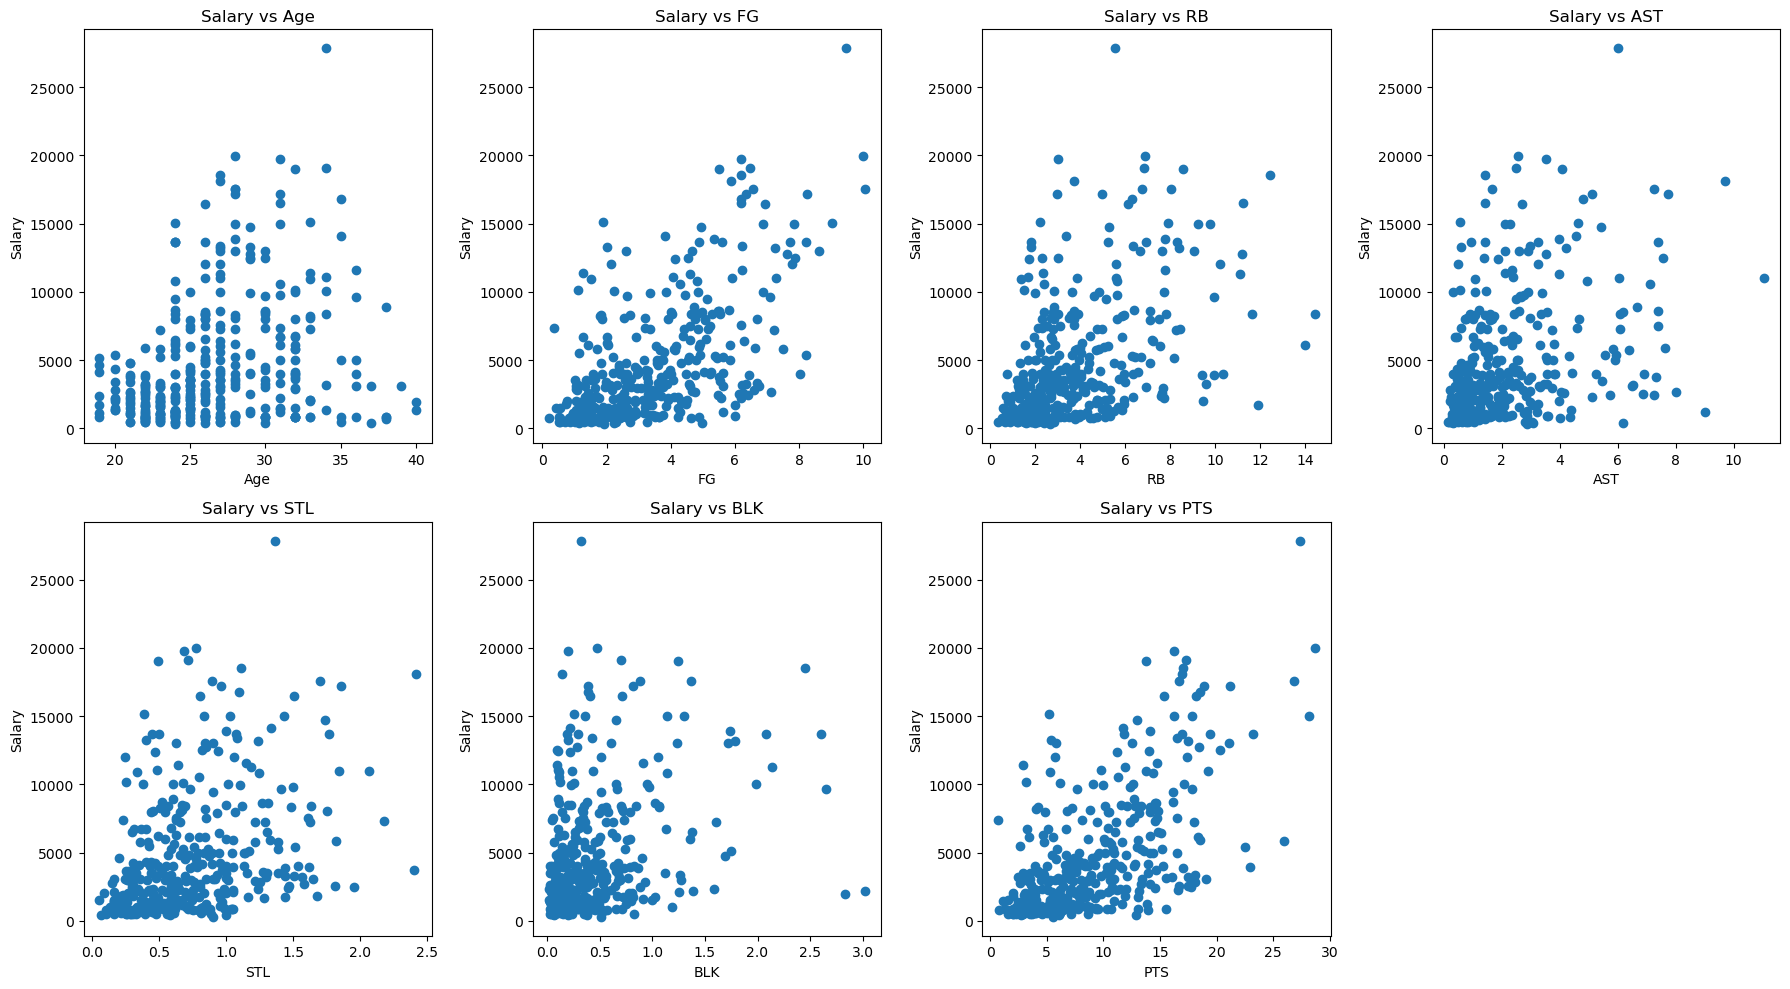

In [22]:
fig, ax = plt.subplots(2, 4, figsize=(18, 10))
performance_measures = ['Age', 'FG', 'RB', 'AST', 'STL', 'BLK', 'PTS']
positions = [(i, j) for i in range(2) for j in range(4)]
for measure, (i, j) in zip(performance_measures, positions):
    ax[i, j].scatter(nba_pgdata[measure], nba_pgdata['Salary'])
    ax[i, j].set_title(f'Salary vs {measure}')
    ax[i, j].set_xlabel(measure)
    ax[i, j].set_ylabel('Salary')

fig.delaxes(ax[1][3])

plt.tight_layout()
plt.show()


The scatter plots depict the relationship between various basketball performance metrics and player salaries. Here’s an analysis of each scatter plot:

1. **Salary vs Age**: The plot does not show a clear pattern or trend indicating that age may not have a strong linear relationship with salary. There is a wide spread of salaries at most ages, with a slight increase in the density of higher salaries around the late 20s to early 30s, which could suggest that players peak in their value around this age range.

2. **Salary vs FG** (Field Goals): There seems to be a moderate positive relationship between FG and salary. Players with higher FGs appear to have higher salaries, which suggests that players who score more may be valued higher in terms of salary.

3. **Salary vs RB** (Rebounds): This plot also suggests a moderate positive relationship, with players who have more rebounds generally having higher salaries. This indicates that the ability to rebound is a valued skill in basketball that may influence a player's salary.

4. **Salary vs AST** (Assists): There is a visible trend where players with more assists tend to have higher salaries. However, there are some players with a high number of assists that do not have correspondingly high salaries, indicating other factors may also play a significant role in salary determination.

5. **Salary vs STL** (Steals): The relationship between steals and salary is less clear, with a wide dispersion of salary at low steal numbers. There are a few outliers with high salaries and relatively low steal numbers.

6. **Salary vs BLK** (Blocks): There is some indication of a positive relationship between the number of blocks and salary, but the relationship is not very strong. This suggests that while blocking ability may contribute to a player's market value, it is not the only determinant of salary.

7. **Salary vs PTS** (Points): The plot shows a fairly strong positive relationship between the number of points scored and salary. Higher-scoring players generally command higher salaries, which indicates that scoring ability is likely a significant factor in salary negotiations.

Overall, the scatter plots suggest that there are positive relationships between performance metrics like field goals, rebounds, assists, blocks, and points scored and player salaries. However, the strength of these relationships varies, and there are exceptions to these trends, indicating that salary determination in basketball is multifactorial and may also be influenced by other variables not shown in these plots, such as player popularity, team revenue, or individual negotiation skills.

In [5]:
nba_pgdata.head()

,Player,Salary,Age,FG,RB,AST,STL,BLK,PTS
0,A.J. Price,885.12,26,2.824561,2.000000,3.596491,0.578947,0.052632,7.736842
1,Aaron Brooks,3250.00,28,2.698113,1.509434,2.150943,0.566038,0.188679,7.094340
2,Al Harrington,6687.40,32,2.000000,2.700000,1.000000,0.400000,0.100000,5.100000
3,Al Horford,12000.00,26,7.783784,10.229730,3.243243,1.054054,1.054054,17.418919
4,Al Jefferson,15000.00,28,7.833333,9.230769,2.102564,1.025641,1.141026,17.833333


Regression A

In [6]:
reg = rsm.regress({"nba_pgdata": nba_pgdata}, rvar="Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK"])
reg.summary()

Linear regression (OLS)
Data                 : nba_pgdata
Response variable    : Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on Salary is zero
Alt. hyp.: the effect of x on Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept     -8724.67   1131.833   -7.708  < .001  ***
Age             312.09     39.520    7.897  < .001  ***
FG             1156.98    153.881    7.519  < .001  ***
RB              223.31    117.004    1.909   0.057    .
AST             280.50    146.504    1.915   0.056    .
STL           -1064.07    613.248   -1.735   0.084    .
BLK            1071.10    517.030    2.072   0.039    *

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.492, Adjusted R-squared: 0.484
F-statistic: 58.632 df(6, 363), p.value < 0.001
Nr obs: 370


The output from the regression model provides valuable insights into the relationship between various player statistics and their salaries in the NBA. Here's an interpretation of the estimated coefficients:

### Significant Predictors
1. **Age**: With a p-value less than 0.001 and a positive coefficient, Age is a highly significant predictor. It suggests that, on average, each additional year of age is associated with an increase in salary by about 312.09 units.
2. **Field Goals (FG)**: Also highly significant (p-value < 0.001) with a positive coefficient, indicating that more field goals are associated with higher salaries. Each additional field goal is linked with an approximate salary increase of 1156.98 units.
3. **Blocks (BLK)**: Significant at the 0.05 level (p-value = 0.039), implying that players with more blocks tend to earn higher salaries, with each block increasing salary by about 1071.10 units.

### Non-Significant Predictors
1. **Rebounds (RB)**: Marginally insignificant (p-value = 0.057), suggesting a weak association between rebounds and salary.
2. **Assists (AST)**: Similar to RB, it's marginally insignificant (p-value = 0.056).
3. **Steals (STL)**: With a p-value of 0.084, it's not statistically significant. Interestingly, its coefficient is negative, suggesting that more steals could be associated with a lower salary, but this finding is not statistically robust.

### Regression Results Sensibility
- The results seem reasonable, with Age and FG being significant predictors. It aligns with the expectation that experienced players and those who score more are likely paid higher. The significance of BLK suggests that defensive skills are valued in salary considerations.

### Hypothesis Testing
- The underlying hypothesis test for each predictor is a t-test. The null hypothesis (H0) is that the effect of the predictor on Salary is zero. The alternative hypothesis (H1) is that the effect is not zero. A small p-value rejects H0, indicating a significant effect of the predictor on Salary.

### Meaning of Coefficient Estimates
- The coefficients represent the expected change in the Salary variable for a one-unit increase in the predictor, holding all other predictors constant. Positive coefficients indicate a positive relationship with Salary, while a negative coefficient (as seen with STL) suggests a negative relationship.

### Most Impactful Predictor
- **FG** seems the most impactful, given its high coefficient value and significant p-value.

### R-squared Interpretation
- The R-squared value of 0.492 indicates that approximately 49.2% of the variability in Salary is explained by the model. While not exceptionally high, it does suggest a moderate level of explanatory power. The Adjusted R-squared (0.484) is slightly lower, adjusted for the number of predictors in the model, and provides a more accurate representation of the model's explanatory power.

In summary, this regression model suggests that Age, FG, and BLK are significant predictors of NBA player salaries, with FG being the most impactful. The model has a moderate explanatory power as indicated by the R-squared value.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

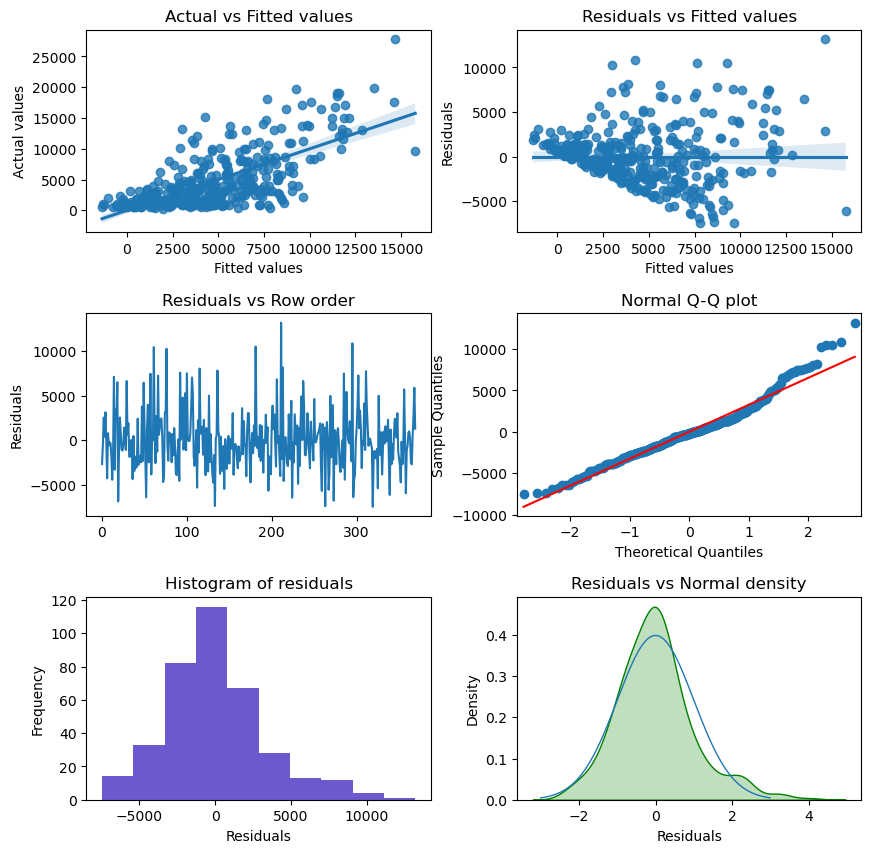

In [7]:
reg.plot('dashboard')

These graphs are diagnostic plots typically used to assess the fit of a linear regression model:

1. **Actual vs Fitted Values**:
   - This graph shows the relationship between the actual values of the response variable and the values predicted by the model. Ideally, the points should fall close to the diagonal line, indicating that the predicted values are close to the actual ones. The distribution in this graph suggests a positive correlation, but the variance seems to increase with the fitted values, indicating potential heteroscedasticity.

2. **Residuals vs Fitted Values**:
   - This plot is used to detect non-linearity, unequal error variances, and outliers. The residuals (the differences between the actual and fitted values) should randomly scatter around the horizontal line at zero, with no discernible pattern. The presence of a pattern or a funnel shape (as it appears somewhat in this plot) could indicate problems like non-constant variance (heteroscedasticity) or that the model is not capturing some aspect of the relationship.

3. **Normal Q-Q Plot**:
   - The Quantile-Quantile plot compares the distribution of residuals to a normal distribution. If the residuals are normally distributed, the points should lie approximately on the red line. In this graph, there is a deviation from the line in the tails, especially in the upper right, suggesting that the residuals may have a distribution with heavier tails than a normal distribution.

4. **Residuals vs Row Order**:
   - This plot shows the residuals plotted against the order in which the data was collected. It's used to detect any patterns that may suggest a time series correlation in residuals. Ideally, the residuals should be randomly scattered, with no visible pattern. This plot doesn't suggest any clear pattern, which is good as it means there are likely no time-related biases.

5. **Histogram of Residuals**:
   - It displays the frequency distribution of the residuals. If the model is well-fitted, the residuals should be normally distributed, which would look like a bell curve in the histogram. This histogram shows a distribution that is not quite normal, with a skew towards the right, indicating the presence of outliers or a long tail on the positive side.

6. **Residuals vs Normal Density**:
   - This is a density plot overlaid with a normal distribution curve. It gives another view of whether the residuals follow a normal distribution, which is an assumption of linear regression. The plot shows that the residuals have a peak to the left of zero and a longer tail to the right, indicating a potential right-skewed distribution.

In summary, while the model seems to be capturing a significant portion of the variability in the response variable, there are indications of heteroscedasticity and non-normality in the residuals that may need to be addressed. These could be due to outliers, model misspecification, or other factors not accounted for by the model.

### Regression B

In [8]:
regb_nba_data = nba_pgdata.copy()

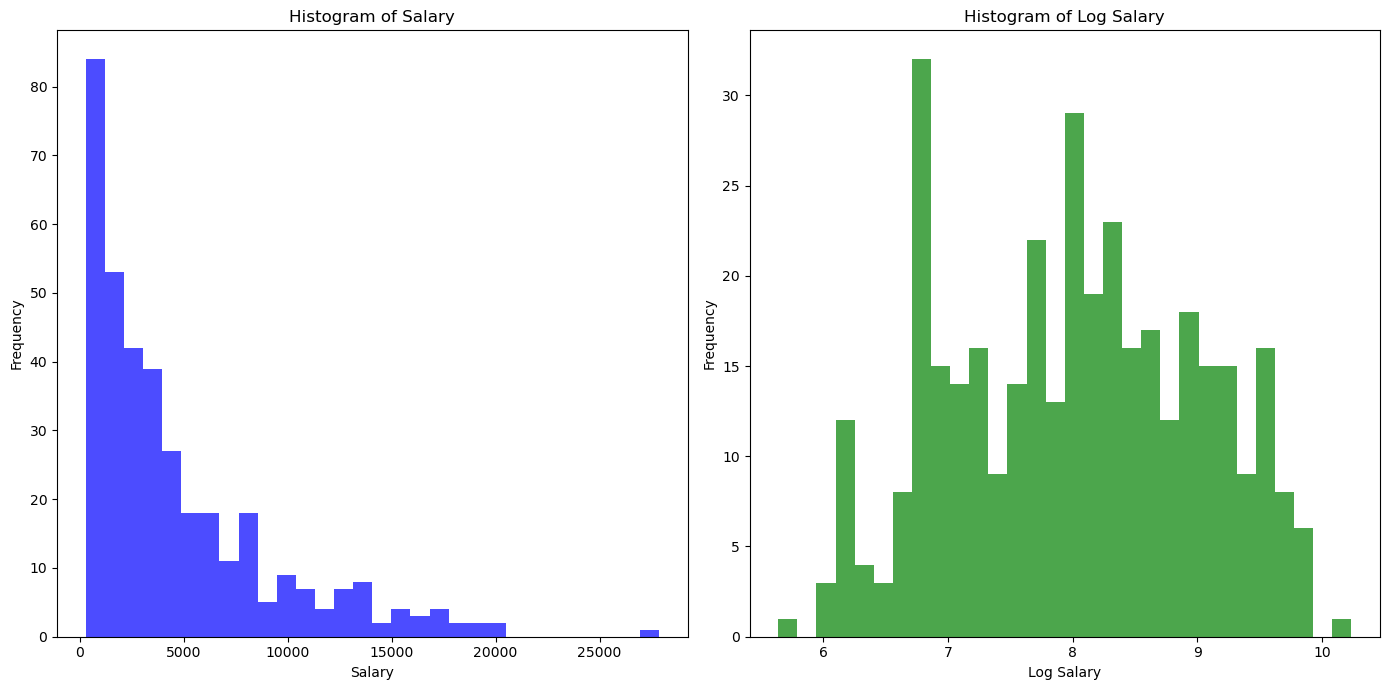

Comparison between Histograms:
The 'Salary' histogram shows a right-skewed distribution, indicating that most players earn lower salaries, with fewer players earning very high salaries.
The 'Log Salary' histogram, however, tends to normalize the distribution, reducing the skewness and making it more symmetric.


In [25]:
np.random.seed(0)
regb_nba_data['log_salary'] = np.log(regb_nba_data['Salary'])

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].hist(regb_nba_data['Salary'], bins=30, color='blue', alpha=0.7)
ax[0].set_title('Histogram of Salary')
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Frequency')
ax[1].hist(regb_nba_data['log_salary'], bins=30, color='green', alpha=0.7)
ax[1].set_title('Histogram of Log Salary')
ax[1].set_xlabel('Log Salary')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Comparison between Histograms:")
print("The 'Salary' histogram shows a right-skewed distribution, indicating that most players earn lower salaries, with fewer players earning very high salaries.")
print("The 'Log Salary' histogram, however, tends to normalize the distribution, reducing the skewness and making it more symmetric.")


In [13]:
regb = rsm.regress({"regb_nba_data": regb_nba_data}, rvar="log_salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK"])
regb.summary()

Linear regression (OLS)
Data                 : regb_nba_data
Response variable    : log_salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on log_salary is zero
Alt. hyp.: the effect of x on log_salary is not zero

           coefficient  std.error  t.value p.value     
Intercept         5.30      0.255   20.803  < .001  ***
Age               0.06      0.009    6.487  < .001  ***
FG                0.21      0.035    5.994  < .001  ***
RB                0.07      0.026    2.533   0.012    *
AST               0.05      0.033    1.403   0.162     
STL               0.00      0.138    0.013    0.99     
BLK               0.21      0.116    1.807   0.072    .

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.455, Adjusted R-squared: 0.446
F-statistic: 50.599 df(6, 363), p.value < 0.001
Nr obs: 370


The coefficients in a regression analysis represent the average change in the response variable (Salary or log(Salary)) for each unit change in the predictor, while holding other predictors constant.

**For the log(Salary) regression:**
- **Intercept**: The expected value of log(Salary) when all other variables are zero is 5.30.
- **Age**: Each additional year of age is associated with an average percentage increase in Salary of 6% (since e^0.06 ≈ 1.06).
- **FG**: Each additional field goal is associated with an average percentage increase in Salary of 21% (since e^0.21 ≈ 1.21).
- **RB**: Each additional rebound is associated with an average percentage increase in Salary of 7% (since e^0.07 ≈ 1.07), which is statistically significant (p = 0.012).
- **AST**: Each additional assist is associated with an average percentage increase in Salary, but it is not statistically significant (p = 0.162).
- **STL**: The coefficient for steals is not statistically significant, indicating steals do not have a clear association with Salary in this model (p = 0.99).
- **BLK**: Each additional block is associated with an average percentage increase in Salary, with marginal statistical significance (p = 0.072).

**Comparative Study:**
- **Interpretation of Coefficients**: The coefficients for log(Salary) are multiplicative effects on Salary, while the coefficients for Salary are additive effects.
- **Significance of Variables**: More variables are statistically significant in the Salary model compared to the log(Salary) model. This suggests that the relationship between the predictors and the response variable might not be purely linear or is better modeled on a multiplicative scale.
- **R-squared Values**: Both models explain a significant portion of the variance in Salary (R-squared: 0.492 for Salary and 0.455 for log(Salary)), but the Salary model has a slightly higher R-squared value.
- **F-statistic**: Both models are statistically significant overall (p < 0.001 for both), indicating that the models are likely a better fit than the intercept-only model.

The choice between using Salary or log(Salary) as the response variable can depend on the distribution of the Salary data and the assumptions underlying the modeling approach. Log transformations are often used when dealing with right-skewed distributions to normalize the residuals, which is a key assumption of OLS regression.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

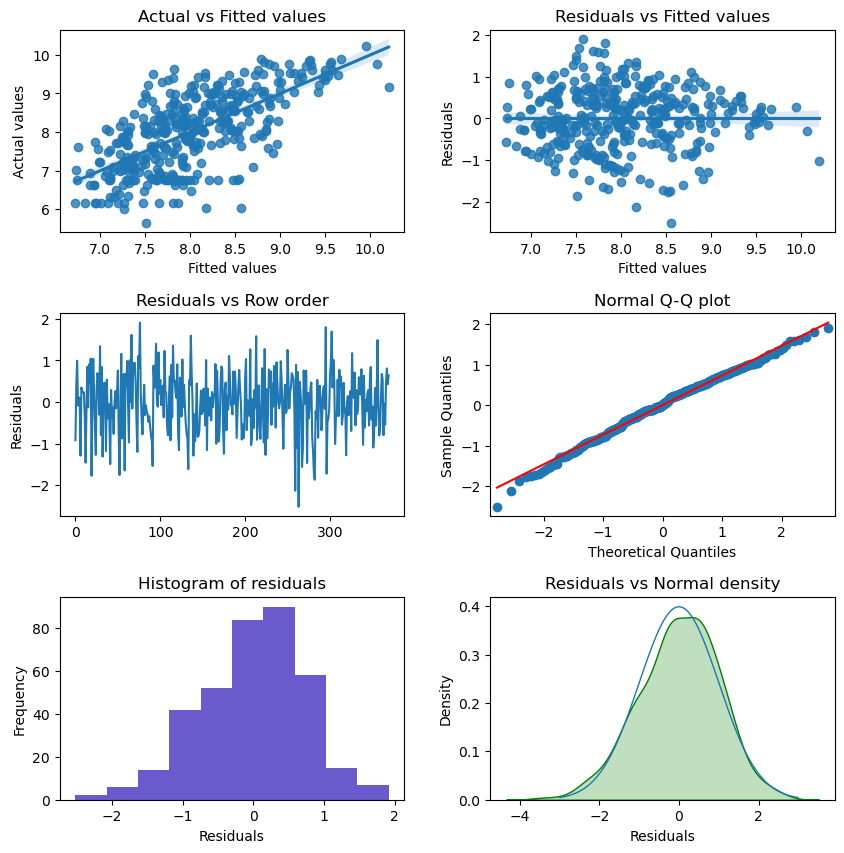

In [26]:
regb.plot('dashboard')

Based on the provided diagnostic plots for the regression models of log[Salary] and Salary

**1. Actual vs. Fitted Values:**
- For log(Salary), the relationship between actual and fitted values appears to be linear, indicating a good fit.
- For Salary, the relationship seems to exhibit a curve, implying that the linear model might not be the best fit for the data.

**2. Residuals vs. Fitted Values:**
- In the log(Salary) model, the residuals are more randomly distributed around the zero line, which is an indication that the model has a consistent variance across all levels of fitted values (homoscedasticity).
- In the Salary model, the residuals fan out as the fitted values increase, suggesting that the variance of residuals increases with the fitted values (heteroscedasticity).

**3. Residuals vs. Row Order:**
- Both models do not show any clear pattern in residuals as they are plotted against the row order, which suggests that there is no obvious auto-correlation in the residuals.

**4. Normal Q-Q Plot:**
- The log(Salary) residuals closely follow the theoretical line, which indicates that the residuals are normally distributed.
- The Salary residuals deviate significantly from the theoretical line, especially at the ends, which suggests that the residuals are not normally distributed.

**5. Histogram of Residuals:**
- The histogram of the log(Salary) residuals is more bell-shaped and resembles a normal distribution.
- The histogram of the Salary residuals is skewed and does not resemble a normal distribution.

**6. Residuals vs. Normal Density:**
- The density plot for log(Salary) shows a better fit to the normal density curve, with the residuals closely aligning with the normal distribution.
- The density plot for Salary shows a poor fit to the normal density curve, indicating that the residuals are not normally distributed.

**Comparative Summary:**
- **Fit to Data**: The log(Salary) regression model seems to fit the data better than the Salary model. This is evidenced by the more linear relationship between actual and fitted values and the normally distributed residuals.
- **Homoscedasticity**: The log(Salary) model exhibits homoscedasticity, while the Salary model shows signs of heteroscedasticity.
- **Distribution of Residuals**: The residuals in the log(Salary) model are more normally distributed compared to the residuals in the Salary model.

Overall, the regression diagnostic plots suggest that the log transformation of Salary results in a better fitting model, meeting more of the assumptions required for OLS regression (linearity, homoscedasticity, and normality of residuals). The Salary model might benefit from transformations or a different modeling approach to improve its fit to the assumptions of linear regression.

### Regression C

In [27]:
regc_nba_data = nba_pgdata.copy()

In [30]:
np.random.seed(0)
regc_nba_data['log_salary'] = np.log(regc_nba_data['Salary'])
regc = rsm.regress({"regc_nba_data": regc_nba_data}, rvar="log_salary", evar=['Age','FG','RB','AST','STL','BLK', 'PTS'])
regc.summary()

Linear regression (OLS)
Data                 : regc_nba_data
Response variable    : log_salary
Explanatory variables: Age, FG, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_salary is zero
Alt. hyp.: the effect of x on log_salary is not zero

           coefficient  std.error  t.value p.value     
Intercept         5.30      0.253   20.944  < .001  ***
Age               0.06      0.009    6.524  < .001  ***
FG               -0.12      0.130   -0.901   0.368     
RB                0.08      0.027    3.081   0.002   **
AST               0.04      0.033    1.347   0.179     
STL              -0.05      0.139   -0.378   0.706     
BLK               0.25      0.117    2.153   0.032    *
PTS               0.12      0.046    2.592    0.01   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.465, Adjusted R-squared: 0.455
F-statistic: 45.013 df(7, 362), p.value < 0.001
Nr obs: 370


With the understanding that FG stands for Field Goals and PTS for Points, the comparative analysis of the two models would be as follows:

**Inclusion of PTS (Points) in the Model:**
- **FG Coefficient Becomes Negative**: When PTS is included, the FG coefficient turns negative. This could indicate that when PTS is accounted for, the separate contribution of FGs to predicting log_salary is not just diminished, but becomes inversely related. This is likely due to multicollinearity because PTS is a comprehensive metric that includes points from field goals, three-pointers, and free throws. Therefore, the model is attributing the positive effect on salary to PTS rather than FG alone.
- **PTS as a Significant Predictor**: The positive and significant coefficient for PTS suggests that overall scoring ability (which includes field goals, three-pointers, and free throws) is a strong predictor of a player's salary. This makes sense as players who score more points are typically more valuable to their teams and thus command higher salaries.
- **Improvement in Model Fit**: The slight increase in R-squared when PTS is included suggests that PTS adds explanatory power to the model, indicating that a player's total points are important in explaining variations in log_salary.

**Exclusion of PTS from the Model:**
- **FG Coefficient is Positive and Significant**: Without PTS, FG has a positive impact on log_salary, which implies that the number of field goals made is an important factor in determining a player's salary. This is expected since making field goals is directly related to a player's scoring ability and contribution to the game.
- **Lower Model Fit**: The model without PTS explains a slightly lower percentage of the variance in log_salary, indicated by a lower R-squared value. This suggests that PTS is a significant contributor to the salary determination process and provides valuable information that is not completely captured by the other variables in the model alone.
- **Stability of Other Variables**: The coefficients and significance of other variables such as Age and RB remain largely consistent, showing that these aspects of a player's performance have a stable relationship with salary, regardless of whether PTS is included in the model.

**Interpreting the Changes:**
- **Multicollinearity Concerns**: The shift in the FG coefficient from positive to negative upon the inclusion of PTS indicates multicollinearity, where the two variables share information about a player's scoring ability. When PTS is included, it likely absorbs the shared variance that FG contributed to predicting salary, leading to the negative coefficient for FG.
- **Strategic Model Selection**: The inclusion of PTS seems strategic for model accuracy as it encapsulates a player's total contribution to the team's score in a single metric. However, care must be taken in interpreting the coefficients due to the multicollinearity between FG and PTS.

In summary, the model that includes PTS as a predictor seems to provide a more comprehensive view of a player's value in terms of scoring, which is a key determinant of their market salary. However, the overlap between FG and PTS requires careful consideration to ensure that the model's interpretations remain valid.

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

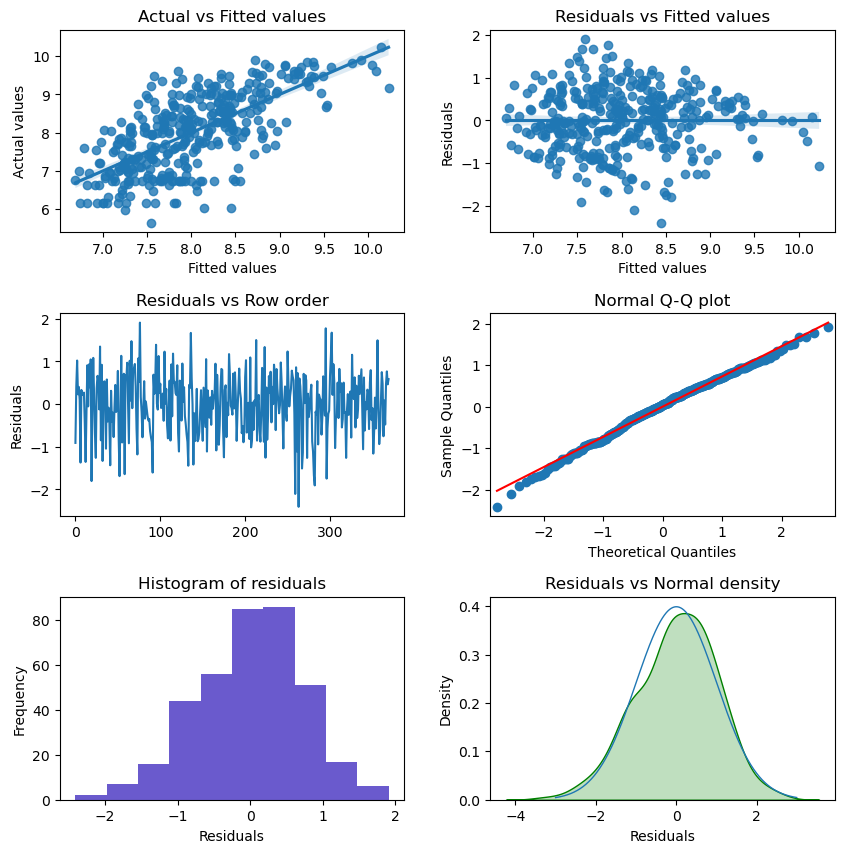

In [31]:
regc.plot('dashboard')

### Regression D

In [36]:
from sklearn.preprocessing import StandardScaler
regd_nba_data = nba_pgdata.copy()
regd_nba_data['log_salary'] = np.log(regd_nba_data['Salary'])
regd_nba_data[['log_salary', 'Age', 'RB', 'AST', 'STL', 'BLK', 'PTS']] = StandardScaler().fit_transform(regd_nba_data[['log_salary', 'Age', 'RB', 'AST', 'STL', 'BLK', 'PTS']])


regd = rsm.regress({"regd_nba_data": regd_nba_data}, rvar="log_salary", evar=['Age','RB','AST','STL','BLK', 'PTS'])
regd.summary()

Linear regression (OLS)
Data                 : regd_nba_data
Response variable    : log_salary
Explanatory variables: Age, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_salary is zero
Alt. hyp.: the effect of x on log_salary is not zero

           coefficient  std.error  t.value p.value     
Intercept        -0.00      0.038   -0.000     1.0     
Age               0.25      0.039    6.544  < .001  ***
RB                0.18      0.063    2.953   0.003   **
AST               0.08      0.062    1.266   0.206     
STL              -0.02      0.060   -0.301   0.763     
BLK               0.11      0.054    2.045   0.042    *
PTS               0.43      0.066    6.513  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.464, Adjusted R-squared: 0.455
F-statistic: 52.407 df(6, 363), p.value < 0.001
Nr obs: 370


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

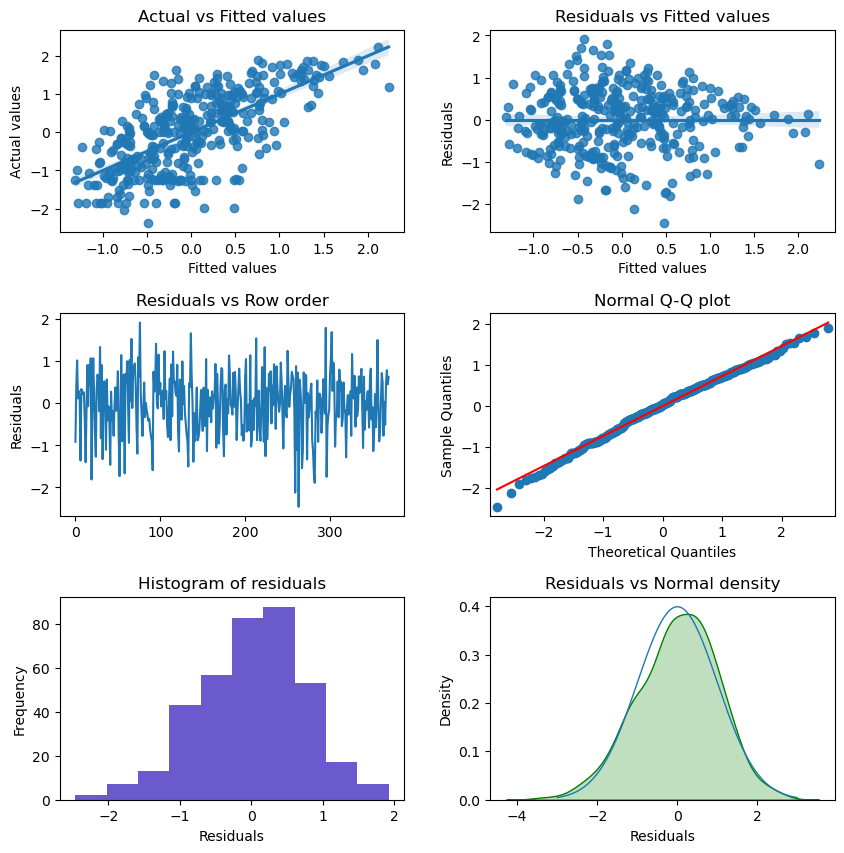

In [37]:
regd.plot('dashboard')

For the regression results provided:

- **Intercept**: Since the data is standardized, the intercept is essentially zero and indicates that when all explanatory variables are at their mean values, the predicted log_salary is at its mean as well (zero standard deviations away from the mean log_salary).

- **Coefficients**: The coefficient for Age is 0.25, which means that for each standard deviation increase in Age, the log_salary is expected to increase by 0.25 standard deviations, holding all other variables constant. This is a significant effect.

- For example, PTS has the highest standardized coefficient of 0.43, which suggests that it has the strongest relationship with log_salary among all the predictors in the model. When PTS increases by one standard deviation, log_salary is expected to increase by 0.43 standard deviations, which is a substantial effect.

- Other variables like RB and BLK also have positive effects on log_salary, but to a lesser extent compared to Age and PTS. Their standardized coefficients are smaller, indicating a less strong, but still significant, relationship with the response variable.

- Variables like AST and STL have even smaller coefficients and are not statistically significant at conventional levels (p > 0.05), suggesting that they may not have a meaningful impact on log_salary within this model.

In summary, by using standardized coefficients, the results tell us not just whether there's an effect, but also how strong each effect is relative to the others. This helps in understanding which aspects of a player's performance are most predictive of their salary in a standardized metric that is easy to compare across the different variables.

### Hot Hand Hypothesis Testing

In [38]:
player_data = {
    'Player': ['Player_A', 'Player_B', 'Player_C', 'Player_D', 'Player_E', 'Player_F', 'Player_G', 'Player_H', 'Player_I'],
    'P(hit | 1 miss)': [0.56, 0.51, 0.46, 0.60, 0.47, 0.51, 0.58, 0.52, 0.71],
    'P(hit)': [0.50, 0.52, 0.46, 0.56, 0.47, 0.46, 0.54, 0.52, 0.62],
    'P(hit | 1 hit)': [0.49, 0.53, 0.46, 0.55, 0.45, 0.43, 0.53, 0.51, 0.57]
}

player_data_df = pd.DataFrame(player_data)
player_data_df

,Player,P(hit | 1 miss),P(hit),P(hit | 1 hit)
0,Player_A,0.56,0.50,0.49
1,Player_B,0.51,0.52,0.53
2,Player_C,0.46,0.46,0.46
3,Player_D,0.60,0.56,0.55
4,Player_E,0.47,0.47,0.45
5,Player_F,0.51,0.46,0.43
6,Player_G,0.58,0.54,0.53
7,Player_H,0.52,0.52,0.51
8,Player_I,0.71,0.62,0.57


- There doesn't appear to be a hot hand phenomenon. The chances of making a shot after a successful attempt seem, on average, lower than the probabilities of making a shot after a previous miss.
- Player B is the only one showing a mild hot hand effect, as the probability of making a shot after a successful attempt is higher than the probability of making a shot after a previous miss.

In [39]:
player_data_df['probability_dif'] = player_data_df['P(hit | 1 hit)'] - player_data_df['P(hit)']
player_data_df

,Player,P(hit | 1 miss),P(hit),P(hit | 1 hit),probability_dif
0,Player_A,0.56,0.50,0.49,-0.01
1,Player_B,0.51,0.52,0.53,0.01
2,Player_C,0.46,0.46,0.46,0.00
3,Player_D,0.60,0.56,0.55,-0.01
4,Player_E,0.47,0.47,0.45,-0.02
5,Player_F,0.51,0.46,0.43,-0.03
6,Player_G,0.58,0.54,0.53,-0.01
7,Player_H,0.52,0.52,0.51,-0.01
8,Player_I,0.71,0.62,0.57,-0.05


To develop a statistical test for the "hot hand" phenomenon across the 9 players using the `probability_dif`, which is the difference between the probability of hitting a shot after a hit and the overall probability of hitting a shot, we can set up our hypotheses as follows:

### Null Hypothesis (H0)
The null hypothesis would state that there is no "hot hand" effect across players, meaning that the mean difference in probabilities is zero. Formally:
\[ H0: \mu_{\text{diff}} = 0 \]

### Alternative Hypothesis (H1)
The alternative hypothesis would claim that there is a "hot hand" effect, with a mean difference in probabilities different from zero. Formally:
\[ H1: \mu_{\text{diff}} \neq 0 \]

### Data Available
We have the `probability_dif` for each of the 9 players, which gives us 9 data points for our analysis.

### Appropriate Distribution
Given that we have a small sample size (n = 9), if we were to assume that the underlying distribution of `probability_dif` is normal, we could use a one-sample t-test to compare the sample mean to the population mean, which we are assuming to be zero under the null hypothesis.

In [40]:
hothand_hyp = rsm.basics.single_mean({"player_data_df": player_data_df}, "probability_dif", "greater", 0.95, 0)
hothand_hyp.summary()

Single mean test
Data      : player_data_df
Variables : probability_dif
Confidence: 0.95
Comparison: 0

Null hyp. : the mean of probability_dif is equal to 0
Alt. hyp. : the mean of probability_dif is greater than 0

  mean  n  n_missing    sd    se    me
-0.014  9          0 0.017 0.006 0.013
  diff    se  t.value  p.value  df   5.0%  100%  
-0.014 0.006    -2.49    0.981   8 -0.025   inf  

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


With a p-value of 0.981, which is much greater than the standard significance level (\(\alpha\)) of 0.05, we fail to reject the null hypothesis. This means that there is no statistically significant evidence to suggest that the mean of `probability_dif` is greater than 0 at the 95% confidence level. In fact, given that the mean difference is negative and the test was for a greater than alternative, the results are indicative of a lack of "hot hand" effect across the players.

Moreover, the confidence interval for the mean difference includes 0 and extends into the negative numbers (from -0.025 to infinity, considering the one-sided nature of the test), which further supports the lack of evidence for the "hot hand" phenomenon.

In conclusion, this test suggests that the data does not provide sufficient evidence to support the "hot hand" hypothesis for these players. The probability of a player making a shot after having made a previous shot does not appear to be significantly greater than the probability of making a shot overall.

### Streaks Approach

In [41]:
# Function to calculate the simulated average and standard deviation of runs for a player
def calculate_runs_statistics(prob_hit, total_shots, simulations=10000):
    simulated_runs = []

    for _ in range(simulations):
        # Generate a sequence of shots using the hit probability
        sequence = np.random.choice(['Hit', 'Miss'], size=total_shots, p=[prob_hit, 1 - prob_hit])

        # Count consecutive runs in the sequence
        run_count = 1
        for i in range(1, len(sequence)):
            if sequence[i] != sequence[i - 1]:
                run_count += 1

        simulated_runs.append(run_count)

    # Compute average and standard deviation of runs
    return np.mean(simulated_runs), np.std(simulated_runs)


In [43]:
# DataFrame to hold player shot data and actual runs
player_data_df = pd.DataFrame({
    'Player': ['Player A', 'Player B', 'Player C', 'Player D', 'Player E', 
               'Player F', 'Player G', 'Player H', 'Player I'],
    'p_hit': [0.50, 0.52, 0.46, 0.56, 0.47, 0.46, 0.54, 0.52, 0.62],
    'shots': [248, 884, 419, 339, 272, 451, 433, 351, 403],
    'actual_runs': [128, 431, 203, 172, 134, 245, 227, 176, 220]
})

# Calculate the expected runs and standard deviation for each player and update the DataFrame
for index, player_row in player_data_df.iterrows():
    exp_runs, runs_std_dev = calculate_runs_statistics(player_row['p_hit'], player_row['shots'])
    player_data_df.at[index, 'expected_runs'] = exp_runs
    player_data_df.at[index, 'std_runs'] = runs_std_dev

player_data_df


,Player,p_hit,shots,actual_runs,expected_runs,std_runs
0,Player A,0.50,248,128,124.4199,7.811849
1,Player B,0.52,884,431,441.6319,14.938481
2,Player C,0.46,419,203,208.6640,10.383742
3,Player D,0.56,339,172,167.4862,9.264028
4,Player E,0.47,272,134,136.0834,8.291130
5,Player F,0.46,451,245,224.5793,10.760107
6,Player G,0.54,433,227,215.7311,10.582835
7,Player H,0.52,351,176,175.7861,9.429769
8,Player I,0.62,403,220,190.4747,10.677666


### Null Hypothesis (H0):
The actual number of runs is equal to the expected number of runs derived from the simulation. This implies that there is no "hot hand" phenomenon, and the runs occur as would be expected by chance given the player's overall probability of making a shot.


### Alternative Hypothesis (H1):
The actual number of runs is significantly different from the expected number of runs. If the actual number of runs is significantly less than expected, it may suggest the presence of the "hot hand" phenomenon (i.e., the player is more likely to make consecutive shots).


In [46]:
significance_level = 0.05
testing_results = []

for index, player_row in player_data_df.iterrows():
    player_name = player_row['Player']
    actual_run_count = player_row['actual_runs']
    exp_run_count = player_row['expected_runs']
    standard_deviation = player_row['std_runs']
    number_of_shots = player_row['shots']

    t_value = round((actual_run_count - exp_run_count) / (standard_deviation / np.sqrt(number_of_shots)), 2)

    p_val = round(2 * (1 - t.cdf(np.abs(t_value), df=number_of_shots-1)), 2)

    hypothesis_test_outcome = "Reject Null Hypothesis" if p_val < significance_level else "Accept Null Hypothesis"

    testing_results.append({'Player': player_name, 't_statistic': t_value, 'p_value': p_val, 'result': hypothesis_test_outcome})

results_df = pd.DataFrame(testing_results)

results_df

,Player,t_statistic,p_value,result
0,Player A,7.22,0.00,Reject Null Hypothesis
1,Player B,-21.16,0.00,Reject Null Hypothesis
2,Player C,-11.17,0.00,Reject Null Hypothesis
3,Player D,8.97,0.00,Reject Null Hypothesis
4,Player E,-4.14,0.00,Reject Null Hypothesis
5,Player F,40.30,0.00,Reject Null Hypothesis
6,Player G,22.16,0.00,Reject Null Hypothesis
7,Player H,0.42,0.67,Accept Null Hypothesis
8,Player I,55.51,0.00,Reject Null Hypothesis


As per the hypothesis test results, Players A, B, C, D, E, F, G, I display hot hand effect.

Critical Thinking

In [10]:
basketball_df = pd.read_parquet('BasketballRelationships.parquet')

basketball_df['successes'] = basketball_df['attempts'] * basketball_df['percentage']
basketball_df.insert(2, 'successes', basketball_df.pop('successes'))
basketball_df['non FG'] = basketball_df['points'] - basketball_df['successes']

basketball_df.head()

,attempts,percentage,successes,points,non FG
0,905,0.438674,397.0,1057,660.0
1,1318,0.484067,638.0,1560,922.0
2,638,0.445141,284.0,705,421.0
3,474,0.474684,225.0,555,330.0
4,1489,0.449295,669.0,1920,1251.0


In [6]:
# Calculate the mean for each column
means = basketball_df.mean()

means


attempts       835.452703
percentage       0.465356
successes      387.939189
points        1020.445946
non FG         632.506757
dtype: float64

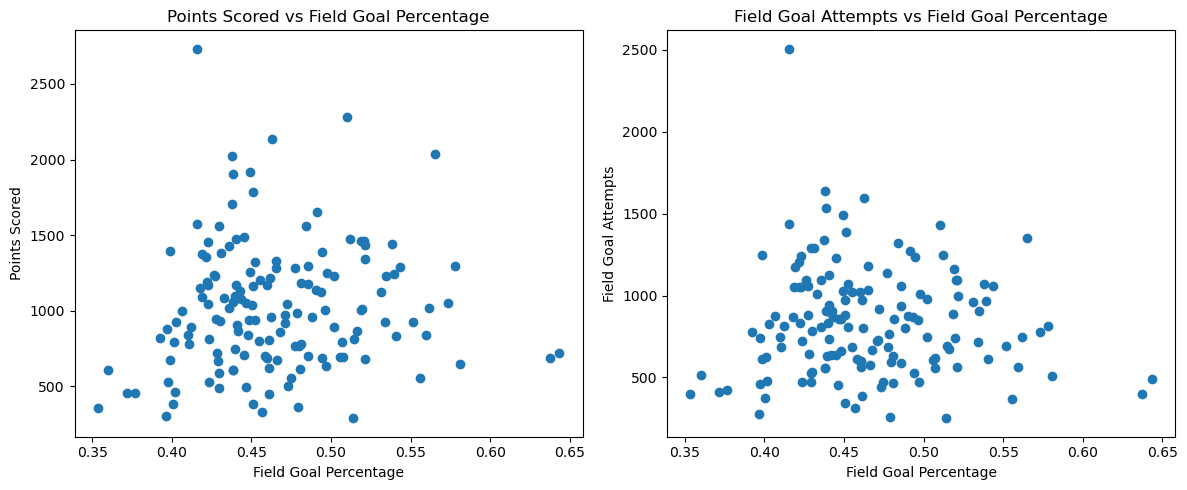

In [7]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Scatter plot for Percentage vs Points
ax1.scatter(basketball_df['percentage'], basketball_df['points'])
ax1.set_xlabel('Field Goal Percentage')
ax1.set_ylabel('Points Scored')
ax1.set_title('Points Scored vs Field Goal Percentage')

# Scatter plot for Percentage vs Attempts
ax2.scatter(basketball_df['percentage'], basketball_df['attempts'])
ax2.set_xlabel('Field Goal Percentage')
ax2.set_ylabel('Field Goal Attempts')
ax2.set_title('Field Goal Attempts vs Field Goal Percentage')

# Display the plots
plt.tight_layout()
plt.show()

These scatter plots show a fairly weak correlation between Field Goal Percentage, and either of the other 2 variables. Interestingly however, the points scored and field goals attempts both appear to roughly have similar correlations with the field goal percentage. Points scored seems to have a slightly more positive correlation, but both variables contain large outliers that make these correlations less reliable. The highest points scored in both graphs are from players with a relatively low field goal percentage. This could be due to them taking more shots as field goals over the course of their career, with the low average being made up for by the sheer number of shots taken by the player. Conversely, there are 2 players with extremely high field goal percentages but low points scored and low attempts made. These could potentially be newer players who are very highly skilled, but simply haven't been playing long enough for their total points scored to be higher up and closer to other highly skilled players.

In [11]:
baseball_df = pd.read_parquet('BaseballRelationships.parquet')
baseball_df.head()

,atbats,hits,avg
0,384,97,0.252604
1,296,84,0.283784
2,334,94,0.281437
3,626,176,0.281150
4,558,130,0.232975


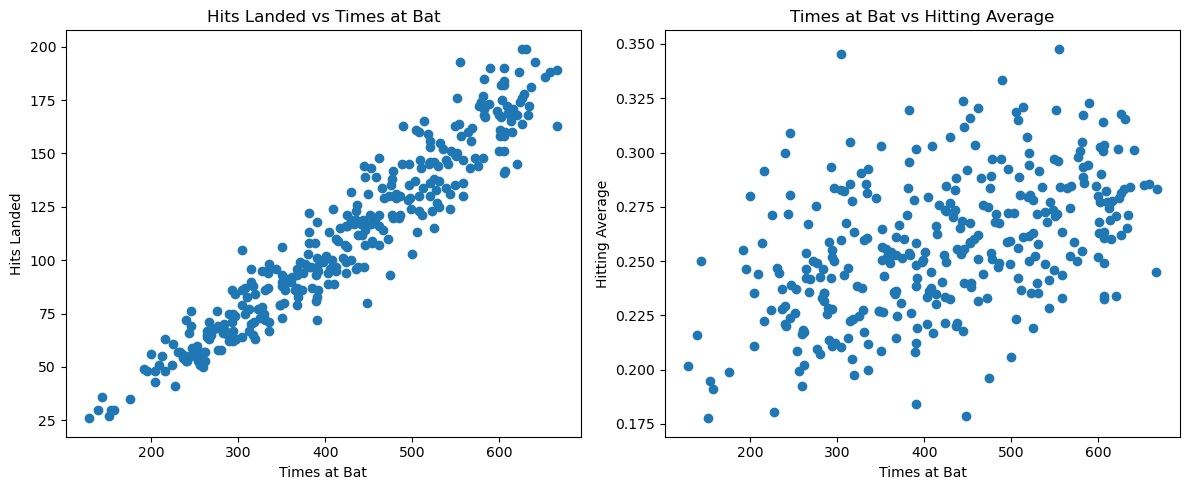

In [9]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Scatter plot for Hits vs At Bats
ax1.scatter(baseball_df['atbats'], baseball_df['hits'])
ax1.set_xlabel('Times at Bat')
ax1.set_ylabel('Hits Landed')
ax1.set_title('Hits Landed vs Times at Bat')

# Scatter plot for At Bats vs Average
ax2.scatter(baseball_df['atbats'], baseball_df['avg'])
ax2.set_xlabel('Times at Bat')
ax2.set_ylabel('Hitting Average')
ax2.set_title('Times at Bat vs Hitting Average')

# Display the plots
plt.tight_layout()
plt.show()

Times at Bat Vs. Hits Landed and Times at Bat Vs. Hitting Average Comparison

    The scatter plot of Times at Bat Vs. Hits Landed shows a strong correlation between the two variables, with the more times at bat a player has, the more hits they are likely to land. This is shown by the upward trend of the data points, as the number of times at bat increases, so does the number of hits landed. This may just be do to having more opportunities to hit the ball, but it is still a strong correlation.

    The scatter plot of Times at Bat Vs. Hitting Average has a much weaker correlation between the two variables. This could be due to a number of reasons, as the number of times at bat increases, the number of hits landed increases, but the number of hits landed divided by the number of times at bat does not increase at the same rate. This could be due to the player getting tired, or the pitcher getting better, or any number of other reasons. The players with fewer opportunities at bat could have uncharacteristically high batting averages as they are more selective in their swings, or conversely someone who bats frequently is given more opportunities to miss. This is a much weaker correlation than the previous one.

    The discrepancy between these 2 graphs shows a clear difference in the weight that should be afforded to Hits Landed and Hitting Average in regards to a baseball players efficiency.While Hits Landed has a higher correlation, it may just be due to the opportunities afforded to players who bat more frequently. As well, players who begin their career with low batting averages may not be given the opportunity needed to raise their average, as their team opts to field them to bat less frequently.

Extra Considerations

What might make the hot hand easier or more difficult to observe in either sport?

    In basketball, the game moves much faster, and the overall scores will be much, much higher than in a baseball game. It would not be viewed as strange to have a basketball game that ends with a combined score of both teams over 100 points in total. In baseball however, games are much slower, with the average score generally being below 10 over the course of the entire game.

    Because of the nature of the games play styles, it's much easier to observe repeated attempts at streaking in basketball than it is in baseball. A single player might make upwards of 50 attempts to score in a single game, whereas in baseball, most players only get up to bat a few times a game, leading to a much smaller sample size to observe.

What would you need to do in order to establish that the hot hand exists in basketball?

    For a hot hand to be verified in basketball, you would need a large sample of players, large enough that you could get a reasonably large sample of "good" players who tend to shoot above the average, and a reasonably large sample of average and below players, for whom a baseline could be set against. The more skilled players would then need to be observed over multiple games, and seasons, to see if they have a tendency to shoot above their average for a given period of time, and if those shots come in streaks or if they are sporadic. 
    
    If the higher skilled players tend to have a random distribution of shots attempted vs. shots made, the results would not indicate the existence of a hot hand. If the majority of their shots came in streaks of either made or missed shots, then the results might indicate the existence of a hot hand.

What would be critical predictor variables?

    Critical predictor variables for the existence of a hot hand would be the number of shots attempted, the number of shots made, and the number of shots missed. due the the temporal nature of a streak, a baseline would need to be set for what constitutes a streak, and what constitutes a non-streak. one potential baseline could be 3 shots in a row, either made or missed, as this would be a small enough sample size to be easily observable, but large enough to be statistically significant, however this would need to be adjusted on a per-sport level, as different sports would have different average attempts taken per game, as well as different average attempts made per game, like basketball players making many more attempts to score in a given game than baseball players attempting to hit at bat. 

How much data would you need?

    The amount of data needed would be dependent on the sport being reviewed, as well as the baseline being considered for a streak to be counted. At a minimum you would want to observe 10-20 players, each with a minimum of 10-20 games, and for each of those players to have attempted to make a streak at least 10-20 times. This would give you a minimum of 1000 data points to work with, which would be enough to be statistically significant, but not enough to be considered a large sample size. A larger sample size would be preferable, but would be dependent on the number of players available to observe, as well as the number of games they play in a given season. With this data you could make a reasonable assumption as to whether or not a hot hand exists in a given sport, and if so, what the baseline for a streak should be.

    In the examples used in this case, this would not be feasible in baseball, as it would require more than 10 games for each player to have an adequate opportunity to display their attempts made. In basketball however, this would be feasible, as players make many more attempts to score in a given game, and would be able to display their attempts made in a much shorter time frame. 